
# Maternal Mortality Across The Globe
_Data investigation project_

_by Tatiana Kurilo_  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
        <ul>
            <li><a href="#trends">Trends of maternal mortality in the world in 1980-2013</a></li>
            <li><a href="#groups">Tendencies in country groups</a></li>
            <li><a href="#factors">Exploring factors of maternal mortality</a></li>
        </ul>
    </li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Recently I came across a discussion of an article about the rates of maternal mortality in the USA. There was an opinion there that the United States are far from being a developed country on this index. Since the Gapminder data were an option for the data investigation project, I decided to explore the sutiation myself using the world data on maternal mortality ratio.  

The following questions were posed and explored in the project: 
 1. How did maternal mortality in the world changed over time? 
 2. How do the changes differ depending on countries and their regional and economic characteristics? 
 3. What other factors may have impact on a country's maternal mortality ratio?

Maternal mortality ratio is the number of maternal deaths divided by the number of live births in a given year, multiplied by 100,000. Maternal death is defined as the death of a women while pregnant or within the 42 days after termination of that pregnancy, regardless of the length and site of the pregnancy, from a cause related to or aggravated by the pregnancy.  

The data available included observations of maternal mortality ratio in 187 countries in 1800-2013. Since for most countries there is information only for specific years during 1980-2013, the exploratory analysis was limited to these years. The data were investigated from time perspective and also in geographical and economical context. Also other parameters of health economy and population were added to determine possible correlations in the trends.

<a id='wrangling'></a>
## Data Wrangling

The data on maternal mortality were obtained from Gapminder.com, section Data/Health/Maternal health, as a .csv file [<a href="#references">1</a>]. Regional information was also downloaded in .csv format [<a href="##references">2</a>]. The classification of income groups for the corresponding years was obtained from the World Bank website as xls. and then truncated and converted to .csv in spreadsheet software [<a href="##references">3</a>].

### General Properties

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [2]:
# Data source: https://www.gapminder.org/data/
# See section: Data/Health/Maternal health/Maternal Mortality

mm_data = pd.read_csv('maternal_mortality_ratio_per_100000_live_births.csv')
mm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 215 entries, country to 2013
dtypes: float64(36), int64(178), object(1)
memory usage: 314.2+ KB


In [3]:
mm_data.head(15)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,730,0,0,0,0,500,0,0,400.0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,24,0,0,0,0,21,0,0,21.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,92,0,0,89.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,Angola,0,0,0,0,0,0,0,0,0,...,0,750,0,0,0,0,530,0,0,460.0
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
6,Argentina,0,0,0,0,0,0,0,0,0,...,0,70,0,0,0,0,76,0,0,69.0
7,Armenia,0,0,0,0,0,0,0,0,0,...,0,37,0,0,0,0,31,0,0,29.0
8,Australia,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,5,0,0,6.0
9,Austria,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,3,0,0,4.0


As can be seen from the example of the data above, for many years there are no observations for most countries (zeros aren't meaningful and come from missing data). We can get more detailed information on each year, counting unique values in each column to find out how many other values beside zero are in the column. 

In [4]:
# detemine for which years there are observations available for most of the countries
pd.options.display.max_rows = 250
mm_data.nunique()

country    187
1800         3
1801         3
1802         3
1803         3
1804         3
1805         3
1806         3
1807         2
1808         3
1809         3
1810         3
1811         3
1812         3
1813         3
1814         2
1815         3
1816         3
1817         3
1818         2
1819         3
1820         3
1821         3
1822         3
1823         3
1824         3
1825         3
1826         3
1827         3
1828         3
1829         3
1830         3
1831         3
1832         3
1833         3
1834         3
1835         3
1836         3
1837         3
1838         3
1839         3
1840         3
1841         3
1842         3
1843         3
1844         3
1845         3
1846         3
1847         4
1848         4
1849         4
1850         4
1851         5
1852         4
1853         4
1854         4
1855         5
1856         4
1857         4
1858         5
1859         4
1860         4
1861         4
1862         4
1863         4
1864         5
1865      

The missing data for years earlier than 1980 limits the possibility of analysing data from deep historical perspective. However, for the last three decades there is enough data for global estimates and comparisons. The pattern in data since 1980 allows to assume that starting from that year a standardized procedure was inplemented for regular data gathering.

Still it may be informative to take a look at the  dynamics of the oldest data available. For this purpose we can use the list of the countries that have records starting from the beginning of the XXth century.

In [5]:
mm_data[mm_data['1900'] > 0][['country', '1900']]

,country,1900
16,Belgium,535
58,Finland,495
155,Sri Lanka,1720
161,Sweden,188
177,United Kingdom,474
178,United States,850


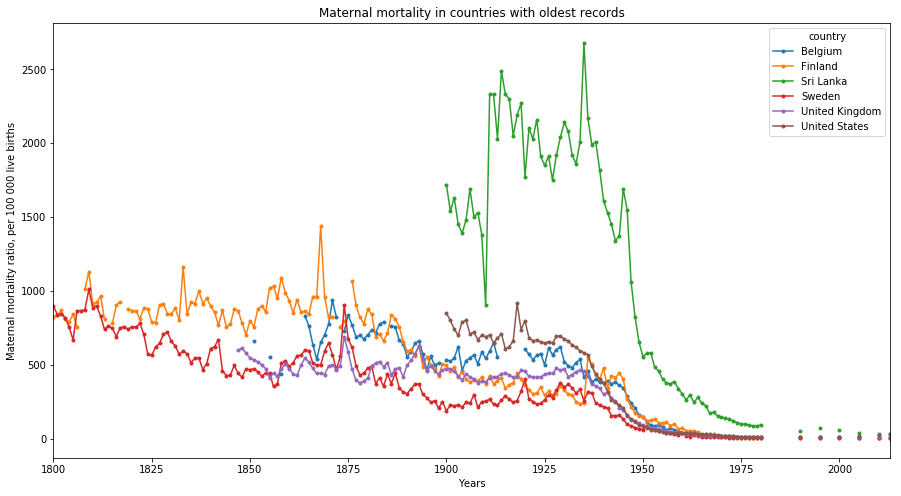

In [6]:
countries_1900 = list(mm_data[mm_data['1900'] > 0]['country'])
plot= mm_data[mm_data['country'].isin(countries_1900)
       ].set_index('country').replace(0, pd.np.nan).T.plot.line(
    figsize = (15, 8), title='Maternal mortality in countries with oldest records', marker='.')
plot.set(xlabel="Years", ylabel="Maternal mortality ratio, per 100 000 live births")
plot;

For most years available Sri Lanka demonstrated much higher values than other countries which are European except for United States. The ratios in the USA are also higher than in Europe representatives in 1900-1935, but to a lesser extent. However, around 1940-1950 a noticeable downward trend started for all six countries. Nevertheless, to inverstigate global tendencies, a greater number of countries is necessary. The data set contains the list of 187 countries, it seems reasonable to limit the number of observation per year to at least 100.

In [7]:
enough_data = mm_data.nunique() > 100
enough_data[enough_data == True]

country    True
1980       True
1990       True
1995       True
2000       True
2005       True
2010       True
2013       True
dtype: bool

In [8]:
# determining countries with no data
(mm_data == 0).astype(int).sum(axis=1)

0      207
1      207
2      207
3      211
4      207
5      211
6      207
7      207
8      129
9      207
10     207
11     207
12     207
13     207
14     207
15     207
16      97
17     207
18     207
19     207
20     207
21     207
22     207
23     207
24     207
25     207
26     207
27     207
28     207
29     207
30     207
31     207
32     207
33     207
34     207
35     207
36     207
37     207
38     207
39     207
40     207
41     207
42     207
43     207
44     207
45     207
46     177
47     207
48     211
49     207
50     207
51     207
52     207
53     207
54     207
55     207
56     207
57     207
58      32
59     207
60     207
61     207
62     207
63     179
64     207
65     207
66     207
67     207
68     207
69     207
70     207
71     207
72     207
73     207
74     207
75     207
76     207
77     207
78     207
79     125
80     207
81     207
82     207
83     174
84     207
85     207
86     207
87     208
88     207
89     207
90     207

Many countries only have data for 7 years of 214 included in the data set. That gives us a limit of 207 "zero years" per row to determine the countries that have missing values for the years where most countries have observations. If the limit is exceeded the country has missing data for any the years chosen for the study.

In [9]:
no_data_countries = (mm_data == 0).astype(int).sum(axis=1) > 207
ndc_index = list((no_data_countries[no_data_countries == True]).index)
ndc_index
mm_data.iloc[ndc_index, [0]]

,country
3,Andorra
5,Antigua and Barbuda
48,Dominica
87,Kiribati
105,Marshall Islands
144,Seychelles
153,South Sudan


For 7 countries included in the source file there is no information provided for most years, the same can be easily observed on Gapminder. Also there are only several years containing observations for almost all countries.  Therefore the data set can be limited to the following seven years: 1980, 1990, 1995, 2000, 2005, 2010 and 2013, which still can properly represent historical dynamics in recent decades.

### Data Preparation

For further exploration we need to subset the data to the list of the years stated above. Also since zeros originated from missing data in the source file, it is reasonable to drop zeros as NAs both for years and countries. That also results in type conversion for integer variables. 

In [10]:
# columns to keep
# this list will also be used further for years as col_list[1:]
col_list = list(enough_data[enough_data == True].index)

mat_mort_100k_lbirths = mm_data[col_list]

mat_mort_100k_lbirths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
country    187 non-null object
1980       187 non-null float64
1990       187 non-null float64
1995       187 non-null int64
2000       187 non-null float64
2005       187 non-null int64
2010       187 non-null int64
2013       182 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 11.8+ KB


In [11]:
#handling missing values

mat_mort_100k_lbirths = mat_mort_100k_lbirths.replace(0, pd.np.nan)
mat_mort_100k_lbirths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
country    187 non-null object
1980       180 non-null float64
1990       187 non-null float64
1995       182 non-null float64
2000       187 non-null float64
2005       182 non-null float64
2010       182 non-null float64
2013       182 non-null float64
dtypes: float64(7), object(1)
memory usage: 11.8+ KB


In [12]:
mat_mort = mat_mort_100k_lbirths.dropna(axis=0, how='any')
mat_mort.describe() 

,1980,1990,1995,2000,2005,2010,2013
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,362.328333,335.472222,302.094444,260.722222,215.272222,180.094444,162.794444
std,418.619707,447.389891,416.882359,357.611163,289.273118,239.007064,216.428132
min,5.800000,6.000000,2.000000,4.000000,2.000000,2.000000,1.000000
25%,49.700000,31.000000,25.000000,24.000000,17.750000,17.500000,14.750000
50%,169.500000,96.500000,89.000000,80.500000,69.500000,69.500000,64.000000
75%,592.250000,550.000000,487.500000,400.000000,322.500000,252.500000,232.500000
max,2120.000000,2300.000000,2400.000000,2200.000000,1600.000000,1200.000000,1100.000000


As can be seen from the summary statistics, the range of maternal mortality ratios narrowed from [5.8, 2120] in 1980 to [1, 1100] in 2013. The mean tends to be closer to the maximum, while the median - much closer to the minimum, which means that the distrubution is positively skewed. IQR has also descreased by 324.8, moving leftward at the same time. 
By visualising the changes of global averages we can see that while the mean decreased gradually over time, the median dropped most significantly in 1980-1990.

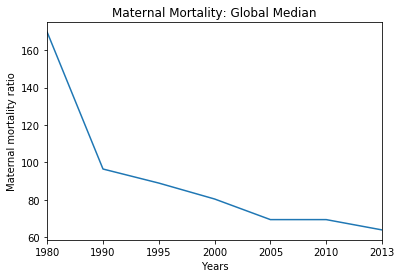

In [13]:
plot = mat_mort.median().plot(title='Maternal Mortality: Global Median')
plot.set(xlabel="Years", ylabel="Maternal mortality ratio")
plot;

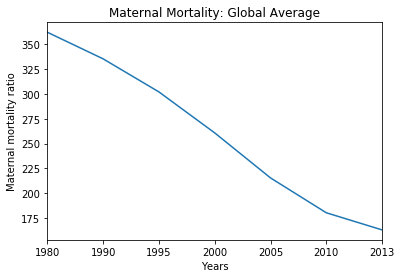

In [14]:
plot = mat_mort.mean().plot(title='Maternal Mortality: Global Average')
plot.set(xlabel="Years", ylabel="Maternal mortality ratio")
plot;

### Extending the data set: region variables
The trends for global mean and median look inspiring - the world definitely seems to becoming a safer place for giving birth. The spread and other statistics of the maternal mortality ratio have decreased during the period in question, most of them - quite noticeably. However, world average indices are not very informative. More insights can be obtained from data structured by geographical or economical parameters. 
Gapminder provides several options of regional divisions in its geographical data.

In [15]:
#data source: https://www.gapminder.org/data/geo/
regions = pd.read_csv('list-of-countries-etc.csv')
regions.columns.values

array(['geo', 'name', 'four_regions', 'eight_regions', 'six_regions',
       'members_oecd_g77', 'Latitude', 'Longitude', 'UN member since',
       'World bank region', 'World bank income group 2017'], dtype=object)

The file contains several variables which won't be used in further analysis, these variable can be omitted. Also strings representing factor variables need to be converted to categorical type. After that both dataframes can be merged together on country names. `'geo'` column is left for merging with income groups data.

In [16]:
# subsetting regional variables
cols_to_keep = ['geo', 'name', 'four_regions', 'eight_regions', 'six_regions',]

regions = regions[cols_to_keep]

# turning string variables into factors
cols_to_factor = ['four_regions', 'eight_regions', 'six_regions']

for column in cols_to_factor:
    regions[column] = regions[column].astype('category')

regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
geo              197 non-null object
name             197 non-null object
four_regions     197 non-null category
eight_regions    197 non-null category
six_regions      197 non-null category
dtypes: category(3), object(2)
memory usage: 4.5+ KB


In [17]:
#merging region info with maternal mortality data
mat_mort_regions = pd.merge(mat_mort, regions, how = 'left', left_on = 'country', right_on = 'name')
mat_mort_regions = mat_mort_regions.drop('name', axis=1)
mat_mort_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 12 columns):
country          180 non-null object
1980             180 non-null float64
1990             180 non-null float64
1995             180 non-null float64
2000             180 non-null float64
2005             180 non-null float64
2010             180 non-null float64
2013             180 non-null float64
geo              180 non-null object
four_regions     180 non-null category
eight_regions    180 non-null category
six_regions      180 non-null category
dtypes: category(3), float64(7), object(2)
memory usage: 15.4+ KB


### Extending the data set: income variables

The World bank data on income groups on Gapminder include the classification for 2017 only, so the data for the earlier years were obtained from the World Bank website directly as .xsl file. The data available started from 1984, so for the purpose of this project the corresponding years were subset starting from 1990.

Country classifications are determined by World Bank once a year and based on estimates of gross national income (GNI) per capita for the previous year. The classification tables include all World Bank members, plus all other economies with populations of more than 30,000. [<a href="#references">4</a>]

In [18]:
#adding income data
wb_income = pd.read_csv('WB_income.csv')
wb_income.head(10)

,code,country,1990,1995,2000,2005,2010,2013
0,AFG,Afghanistan,L,L,L,L,L,L
1,ALB,Albania,LM,L,LM,LM,UM,UM
2,DZA,Algeria,LM,LM,LM,LM,UM,UM
3,ASM,American Samoa,UM,UM,UM,UM,UM,UM
4,AND,Andorra,H,H,H,H,H,H
5,AGO,Angola,LM,L,L,LM,LM,UM
6,ATG,Antigua and Barbuda,UM,UM,UM,H,UM,H
7,ARG,Argentina,LM,UM,UM,UM,UM,UM
8,ARM,Armenia,..,L,L,LM,LM,LM
9,ABW,Aruba,H,H,H,H,H,H


Missing data in the file are represented by ".." and need to be replaced by NaN values. The names of countries may differ from those in Gapminder data, so 'code' column will be used for merging and 'country' column may be excluded.

In [19]:
wb_income = wb_income.replace("..", pd.np.nan)
wb_income = wb_income.drop(['country'], axis=1)
wb_income.head()

,code,1990,1995,2000,2005,2010,2013
0,AFG,L,L,L,L,L,L
1,ALB,LM,L,LM,LM,UM,UM
2,DZA,LM,LM,LM,LM,UM,UM
3,ASM,UM,UM,UM,UM,UM,UM
4,AND,H,H,H,H,H,H


The data represent the classification of income groups encoded with first letters:
>H - High income  
>UM - Upper middle income  
>LM - Lower middle income   
>L - Low income   

To estimate the change in countries' economic situations we can convert these group names to numeric ranks. This also will allow us to get a country's average performance during the period in question. 

In [20]:
#setting numeric ranks
def income_to_rank(value):
    """
    The fuction returns numeric ranks for World bank income group labels
    """
    val_dict = {"L": 1, "LM": 2, "UM": 3, "H": 4}
    if value is not pd.np.nan:
        return val_dict[value]
    else:
        return value

years = ['1990', '1995', '2000', '2005', '2010', '2013']
for year in years:
    col_name = year + '_inc_rank' 
    wb_income[col_name] = wb_income[year].map(income_to_rank)

#getting average rank for 1990-2013
wb_income['avg_inc_rank'] = wb_income.iloc[:, 7:13].mean(axis=1)    
wb_income.head()

,code,1990,1995,2000,2005,2010,2013,1990_inc_rank,1995_inc_rank,2000_inc_rank,2005_inc_rank,2010_inc_rank,2013_inc_rank,avg_inc_rank
0,AFG,L,L,L,L,L,L,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
1,ALB,LM,L,LM,LM,UM,UM,2.0,1.0,2.0,2.0,3.0,3.0,2.166667
2,DZA,LM,LM,LM,LM,UM,UM,2.0,2.0,2.0,2.0,3.0,3.0,2.333333
3,ASM,UM,UM,UM,UM,UM,UM,3.0,3.0,3.0,3.0,3.0,3.0,3.000000
4,AND,H,H,H,H,H,H,4.0,4.0,4.0,4.0,4.0,4.0,4.000000


In [21]:
#getting change in ranking during 1990-2013
for year in years[1:]:
    col_name = year + '_rank_change'
    if year == '2013':
        prev_year = str(int(year) - 3)
    else:
        prev_year = str(int(year) - 5)
    wb_income[col_name] = wb_income[(year + '_inc_rank')] - wb_income[(prev_year + '_inc_rank')]

wb_income['rank_change_sum'] = wb_income.iloc[:, 14:19].sum(axis=1)
wb_income.head()

,code,1990,1995,2000,2005,2010,2013,1990_inc_rank,1995_inc_rank,2000_inc_rank,2005_inc_rank,2010_inc_rank,2013_inc_rank,avg_inc_rank,1995_rank_change,2000_rank_change,2005_rank_change,2010_rank_change,2013_rank_change,rank_change_sum
0,AFG,L,L,L,L,L,L,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,ALB,LM,L,LM,LM,UM,UM,2.0,1.0,2.0,2.0,3.0,3.0,2.166667,-1.0,1.0,0.0,1.0,0.0,1.0
2,DZA,LM,LM,LM,LM,UM,UM,2.0,2.0,2.0,2.0,3.0,3.0,2.333333,0.0,0.0,0.0,1.0,0.0,1.0
3,ASM,UM,UM,UM,UM,UM,UM,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,AND,H,H,H,H,H,H,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#excluding auxiliary columns
wb_income = wb_income.drop(["1990_inc_rank", "1995_inc_rank", "2000_inc_rank", 
                            "2005_inc_rank", "2010_inc_rank", "2013_inc_rank",
                            "1995_rank_change", "2000_rank_change", 
                            "2005_rank_change", "2010_rank_change", "2013_rank_change"], axis=1)
wb_income.head()

,code,1990,1995,2000,2005,2010,2013,avg_inc_rank,rank_change_sum
0,AFG,L,L,L,L,L,L,1.000000,0.0
1,ALB,LM,L,LM,LM,UM,UM,2.166667,1.0
2,DZA,LM,LM,LM,LM,UM,UM,2.333333,1.0
3,ASM,UM,UM,UM,UM,UM,UM,3.000000,0.0
4,AND,H,H,H,H,H,H,4.000000,0.0


In [23]:
# converting income group labels for readability
wb_income[years] = wb_income[years].replace('L', 'Low income')
wb_income[years] = wb_income[years].replace('LM', 'Lower middle income')
wb_income[years] = wb_income[years].replace('UM','Upper middle income')
wb_income[years] = wb_income[years].replace('H', 'High income')

for year in years:
    wb_income[year] = wb_income[year].astype('category')

#converting geocodes to lowercase for merging
wb_income['code'] = wb_income['code'].str.lower()

wb_income.head()

,code,1990,1995,2000,2005,2010,2013,avg_inc_rank,rank_change_sum
0,afg,Low income,Low income,Low income,Low income,Low income,Low income,1.000000,0.0
1,alb,Lower middle income,Low income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,2.166667,1.0
2,dza,Lower middle income,Lower middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,2.333333,1.0
3,asm,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,3.000000,0.0
4,and,High income,High income,High income,High income,High income,High income,4.000000,0.0


In [24]:
wb_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
code               218 non-null object
1990               175 non-null category
1995               203 non-null category
2000               205 non-null category
2005               206 non-null category
2010               215 non-null category
2013               215 non-null category
avg_inc_rank       216 non-null float64
rank_change_sum    214 non-null float64
dtypes: category(6), float64(2), object(1)
memory usage: 7.6+ KB


In [25]:
mat_mort_regions = pd.merge(mat_mort_regions, wb_income, how = 'left', left_on = 'geo', right_on = 'code', suffixes=('', '_income'))
mat_mort_regions = mat_mort_regions.drop(['geo', 'code'], axis=1)
mat_mort_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 19 columns):
country            180 non-null object
1980               180 non-null float64
1990               180 non-null float64
1995               180 non-null float64
2000               180 non-null float64
2005               180 non-null float64
2010               180 non-null float64
2013               180 non-null float64
four_regions       180 non-null category
eight_regions      180 non-null category
six_regions        180 non-null category
1990_income        153 non-null category
1995_income        177 non-null category
2000_income        177 non-null category
2005_income        178 non-null category
2010_income        180 non-null category
2013_income        180 non-null category
avg_inc_rank       180 non-null float64
rank_change_sum    180 non-null float64
dtypes: category(9), float64(9), object(1)
memory usage: 18.9+ KB


In [26]:
# getting the list of countries having missing data in income classification for 1990
", ".join(list(mat_mort_regions[pd.isnull(mat_mort_regions['1990_income'])]['country'].sort_values()))

'Armenia, Azerbaijan, Belarus, Bosnia and Herzegovina, Croatia, Czech Republic, Eritrea, Estonia, Georgia, Kazakhstan, Kyrgyz Republic, Latvia, Lithuania, Macedonia, FYR, Micronesia, Fed. Sts., Moldova, Montenegro, Palestine, Russia, Serbia, Slovak Republic, Slovenia, Tajikistan, Timor-Leste, Turkmenistan, Ukraine, Uzbekistan'

The prepared data frame contains data on country names, maternal mortality ratio for each country in a list of year (1980, 1990, 1995, 2000, 2005, 2010, 2013), three option of regional classifications, income classifications for the corresponding years, excluding 1980, average income ranks and change in income rank in 1990-2013. The income missing data of 1990 refer mostly to countries which at that time were part of other states, like the USSR, Yugoslavia and Czechoslovakia, which should be taken into account during exploratory analysis.

<a id='eda'></a>
## Exploratory Data Analysis


<a id='trends'></a>
### Trends of maternal mortality in the world in 1980-2013
With the data cleaned and prepared for further investigation we can now take a closer look at maternal mortality dynamics in the world and its regions. 

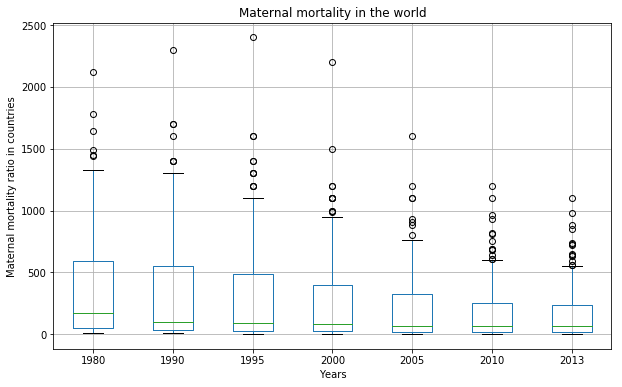

In [27]:
# world distribution
years = ['1980'] + years

plot = mat_mort_regions[years].boxplot(figsize = (10, 6))
plot.set(xlabel = 'Years', ylabel='Maternal mortality ratio in countries', title = 'Maternal mortality in the world')
plot;

During 1980-2013 years maternal mortality in the world has decreased significantly. The distribution of observations became narrower and more concentrated below 100 cases per 100000 live births. 

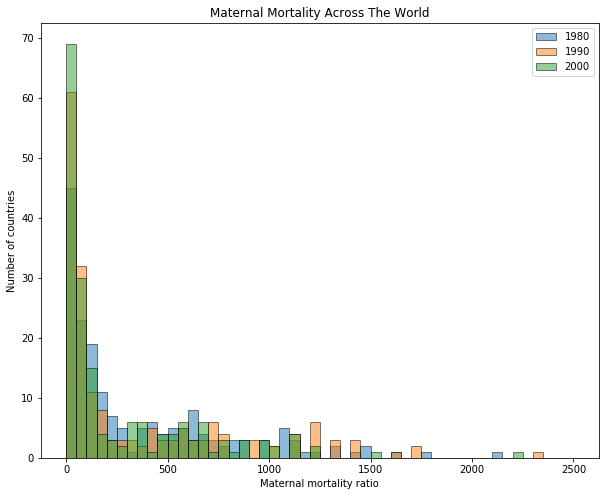

In [28]:
def plot_many_hists(years, data, figsize = (9, 8)):
    """
    The function takes in a list of years, a dataframe with these years 
    and (optional) a tuple with the dimensions of the plot and shows 
    the plot with several distributions on it
    """
    plt.figure(figsize = figsize)
    for year in years:
        plt.hist(data[year], edgecolor='black', 
                 range=(0,2500), bins = 2500//50, alpha=0.5, label=year)
    plt.title('Maternal Mortality Across The World')
    plt.xlabel('Maternal mortality ratio')
    plt.ylabel('Number of countries')
    plt.legend(loc='upper right')
    plt.show()

decades = ['1980', '1990', '2000']

plot_many_hists(decades, mat_mort_regions, (10, 8))

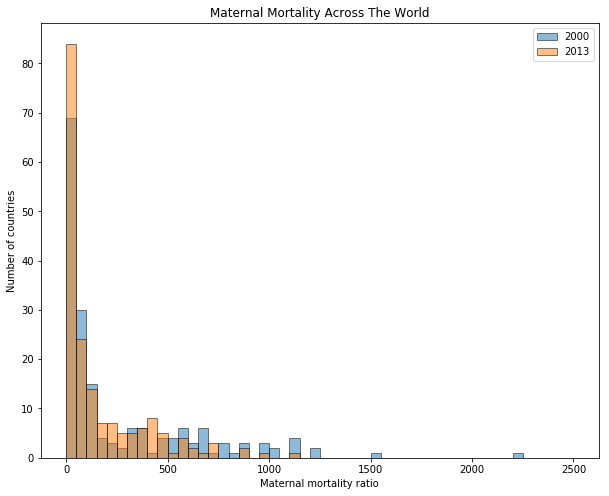

In [29]:
xxi = ['2000', '2013']

plot_many_hists(xxi, mat_mort_regions, (10, 8))

In [30]:
mat_mort_stats = mat_mort_regions[years].describe()
mat_mort_stats = mat_mort_stats.T
mat_mort_stats

,count,mean,std,min,25%,50%,75%,max
1980,180.0,362.328333,418.619707,5.8,49.70,169.5,592.25,2120.0
1990,180.0,335.472222,447.389891,6.0,31.00,96.5,550.00,2300.0
1995,180.0,302.094444,416.882359,2.0,25.00,89.0,487.50,2400.0
2000,180.0,260.722222,357.611163,4.0,24.00,80.5,400.00,2200.0
2005,180.0,215.272222,289.273118,2.0,17.75,69.5,322.50,1600.0
2010,180.0,180.094444,239.007064,2.0,17.50,69.5,252.50,1200.0
2013,180.0,162.794444,216.428132,1.0,14.75,64.0,232.50,1100.0


In [31]:
mm_diff = (mat_mort_regions.describe()['2013'] - mat_mort_regions.describe()['1980'])/mat_mort_regions.describe()['1980']
mm_diff.loc[['min', 'max', 'mean', '25%', '50%', '75%']]

min    -0.827586
max    -0.481132
mean   -0.550699
25%    -0.703219
50%    -0.622419
75%    -0.607429
dtype: float64

The mean mortality ratio over the world dropped from 362.3 in 1980 to 162.8 in 2013 (or by 55.1%). The median decreased from 169.5 in 1980 to 64 in 2013 (by 62.2%, mostly during 1980-1990). The mean was decreasing gradually during the whole period in question, while the median dropped most significantly in 1980-1990. This can be observed on the following chart.

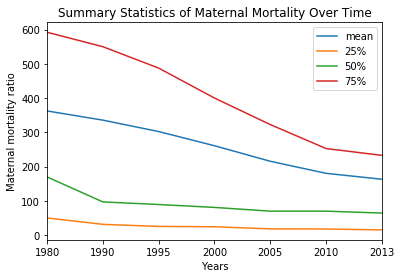

In [32]:
plot = mat_mort_stats[['mean', '25%', '50%', '75%']].plot.line(title = "Summary Statistics of Maternal Mortality Over Time")
plot.set(xlabel = 'Years', ylabel = 'Maternal mortality ratio');

In [33]:
def below_world_avg_in_year(year, data):
    """
    Returns world average for the year and the number and proportion of the countries 
    who had maternal mortality ratio below the world average in a given year
    """
    year = str(year)
    world_avg = data[year].mean()
    above_avg = data[year] < world_avg
    n_countries = above_avg.sum()
    proportion = above_avg.mean()
    
    return (year, round(world_avg, 2), n_countries, round(proportion, 2))

for year in col_list[1:]:
    print(below_world_avg_in_year(year, mat_mort_regions))

('1980', 362.32999999999998, 113, 0.63)
('1990', 335.47000000000003, 121, 0.67000000000000004)
('1995', 302.08999999999997, 122, 0.68000000000000005)
('2000', 260.72000000000003, 121, 0.67000000000000004)
('2005', 215.27000000000001, 120, 0.67000000000000004)
('2010', 180.09, 122, 0.68000000000000005)
('2013', 162.78999999999999, 122, 0.68000000000000005)


In [34]:
print('year', '>1k', '<100')
for year in col_list[1:]:
    print(year, 
          round(mat_mort_regions[mat_mort_regions[year] > 1000]['country'].count()*100/mat_mort_regions['country'].count(), 2),
          round(mat_mort_regions[mat_mort_regions[year] < 100]['country'].count()*100/mat_mort_regions['country'].count(), 2))

year >1k <100
1980 10.0 37.78
1990 11.11 51.67
1995 7.78 54.44
2000 4.44 55.0
2005 2.22 57.78
2010 1.11 58.89
2013 0.56 60.0


The share of countries having maternal mortality ratios lower than world average remained at 67-68% in 1990-2013, and was only several percent lower in 1980 (63%). Meanwhile the number of countries with maternal mortality ratio lower than 100 increased from 37.8% in 1980 to 60% in 2013.  

The following countries were on the top and bottom positions during the years in question:

In [35]:
for year in col_list[1:]:
    print('Maximum:', mat_mort_regions.iloc[mat_mort_regions[year].idxmax()][['country', year]])
    print('Minimum:', mat_mort_regions.iloc[mat_mort_regions[year].idxmin()][['country', year]])
    print()

Maximum: country    Bhutan
1980         2120
Name: 17, dtype: object
Minimum: country    Sweden
1980          5.8
Name: 154, dtype: object

Maximum: country    Sierra Leone
1990               2300
Name: 139, dtype: object
Minimum: country    Canada
1990            6
Name: 28, dtype: object

Maximum: country    Sierra Leone
1995               2400
Name: 139, dtype: object
Minimum: country    Greece
1995            2
Name: 62, dtype: object

Maximum: country    Sierra Leone
2000               2200
Name: 139, dtype: object
Minimum: country    Italy
2000           4
Name: 78, dtype: object

Maximum: country    Sierra Leone
2005               1600
Name: 139, dtype: object
Minimum: country    Ireland
2005             2
Name: 76, dtype: object

Maximum: country    Sierra Leone
2010               1200
Name: 139, dtype: object
Minimum: country    Belarus
2010             2
Name: 13, dtype: object

Maximum: country    Sierra Leone
2013               1100
Name: 139, dtype: object
Minimum: country

In [36]:
mat_mort_regions[mat_mort_regions['country'] == 'Sierra Leone']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
139,Sierra Leone,1240.0,2300.0,2400.0,2200.0,1600.0,1200.0,1100.0,africa,africa_sub_saharan,sub_saharan_africa,Low income,Low income,Low income,Low income,Low income,Low income,1.0,0.0


In [37]:
mat_mort_regions[mat_mort_regions['country'] == 'Bhutan']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
17,Bhutan,2120.0,900.0,610.0,390.0,240.0,140.0,120.0,asia,asia_west,south_asia,Low income,Low income,Low income,Low income,Lower middle income,Lower middle income,1.333333,1.0


In [38]:
mat_mort_regions[mat_mort_regions['country'] == 'Sweden']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
154,Sweden,5.8,6.0,5.0,5.0,4.0,5.0,4.0,europe,europe_west,europe_central_asia,High income,High income,High income,High income,High income,High income,4.0,0.0


In [39]:
mat_mort_regions[mat_mort_regions['country'] == 'Canada']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
28,Canada,7.5,6.0,7.0,7.0,11.0,13.0,11.0,americas,america_north,america,High income,High income,High income,High income,High income,High income,4.0,0.0


In [40]:
mat_mort_regions[mat_mort_regions['country'] == 'Greece']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
62,Greece,17.8,6.0,2.0,5.0,3.0,5.0,5.0,europe,europe_west,europe_central_asia,Upper middle income,Upper middle income,High income,High income,High income,High income,3.666667,1.0


In [41]:
mat_mort_regions[mat_mort_regions['country'] == 'Italy']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
78,Italy,13.8,10.0,6.0,4.0,5.0,4.0,4.0,europe,europe_west,europe_central_asia,High income,High income,High income,High income,High income,High income,4.0,0.0


In [42]:
mat_mort_regions[mat_mort_regions['country'] == 'Ireland']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
76,Ireland,10.6,6.0,4.0,6.0,2.0,10.0,9.0,europe,europe_west,europe_central_asia,High income,High income,High income,High income,High income,High income,4.0,0.0


In [43]:
mat_mort_regions[mat_mort_regions['country'] == 'Belarus']

,country,1980,1990,1995,2000,2005,2010,2013,four_regions,eight_regions,six_regions,1990_income,1995_income,2000_income,2005_income,2010_income,2013_income,avg_inc_rank,rank_change_sum
13,Belarus,29.6,37.0,29.0,32.0,21.0,2.0,1.0,europe,europe_east,europe_central_asia,NaN,Lower middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,2.4,1.0


The lowest ratios during 1980-2013 were observed in European countries. The highest ratio in 1980 was seen in Bhutan, but the country followed the world trend of decreasing maternal mortality during the following decades (alongside the improvement of its income ranking position). The new "leader" - Sierra Leone - emerged in 1990, and demonstrated quite different dynamics - with even more increase in 1995 (the peak corresponds to the years of the civil war in the country [<a href="#references">5</a>] ). Sierra Leone was able to return to the level of 1980 only in 2010, getting back to the global trend after 2000.

<a id='groups'></a>
### Tendencies in country groups
##### Income groups
The divisions into income groups is based on the classifications reported annualy by the World Bank [<a href="#references">3</a>]. Of these data only the years corresponding to those in maternal mortality data set were used. 
In exploratory analisys of maternal mortality from the perspective of a country's economic position the following questions may be considered:
1. How did the countries progress depending on their ranks in the beginning of the period in question?
2. Does the improvement in economic positions correspond to the decrease of maternal mortality ratios?

Since the data on income group for 1980 are unavailable, the earliest year to consider is 1990. The sublots define four different patterns depending on the income groups. 

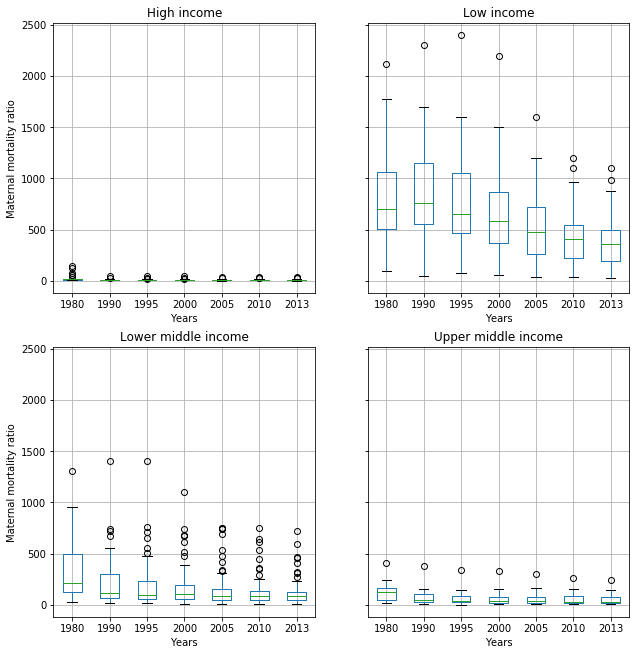

In [44]:
# distributions in different income groups

def make_box_plot(df, group, x_lab, y_lab, fig_size = (10,11)):
    """
    The function returns a set of labeled subplots for specific groups of a variable in a dataframe
    """
    sub_df = df.drop(['avg_inc_rank', 'rank_change_sum'], axis=1)
    plots = sub_df.groupby(group).boxplot(figsize = fig_size)
    for plot in plots:
        plot.set(xlabel = x_lab, ylabel = y_lab)
        
    
make_box_plot(mat_mort_regions, '1990_income', 'Years', 'Maternal mortality ratio')

In [45]:
mat_mort_regions.groupby('1990_income')['1980', '2010'].describe()

1980                                               \
                    count        mean         std   min     25%    50%   
1990_income                                                              
High income          29.0   26.248276   34.298913   5.8    8.60   12.4   
Low income           51.0  791.017647  414.181622  91.9  507.50  699.0   
Lower middle income  54.0  319.079630  277.838984  22.1  122.50  215.5   
Upper middle income  19.0  122.084211   95.354416  17.8   50.05  124.0   

                                     2010                                \
                        75%     max count        mean         std   min   
1990_income                                                               
High income            19.6   148.0  29.0   10.103448    7.875572   3.0   
Low income           1060.0  2120.0  51.0  424.843137  272.623871  32.0   
Lower middle income   492.5  1310.0  54.0  143.777778  169.456363   4.0   
Upper middle income   161.5   403.0  19.0   61.526316   66.027241   5.0   

                                                   
                        25%    50%    75%     max  
1990_income                                        
High income            5.00    7.0   12.0    38.0  
Low income           220.00  410.0  540.0  1200.0  
Lower middle income   47.25   82.0  137.5   750.0  
Upper middle income   15.50   24.0   82.5   260.0

In [46]:
def get_change(group, data, year_1, year_2):
    """
    The function returns the change of mean and median in percentage 
    for two given years, data split into categories of the group
    """
    year_1 = str(year_1)
    year_2 = str(year_2)
    group_year1 = data.groupby(group).describe()[year_1]
    group_year2 = data.groupby(group).describe()[year_2]
    change = (group_year2 - group_year1)*100/group_year1
    return change[['mean', '50%']]

In [47]:
# change in maternal mortality ratio in 2013 in comparison with 1980
get_change('1990_income', mat_mort_regions, 1980, 2013)

,mean,50%
1990_income,,
High income,-64.923805,-51.612903
Low income,-51.425193,-48.497854
Lower middle income,-59.066296,-62.180974
Upper middle income,-53.354027,-78.225806


As we can see from the plots and summary statistics, in high income countries the distribution of maternal mortality ratios was and remained quite narrow and close to 0. The number of outliers has decreased over time. 
In upper middle income group the range of the distribution fell below 500 in 1980 and mostly got down 250 by 2013.
In lower middle income group the range narrowed dramatically (from about 950 to 250 for its upper limit), still the number of outliers is pretty noticeable.
In low income group the distribution is the widest for each year. Though it tends to become narrower, the decrease is rather gradual. This group also had the lowest decrease in mean and median of maternal mortality ratio distribution than other income groups.

However, the trends described above doesn't include the countries, which didn't have a separate income rank in 1990. We can plot them separately.

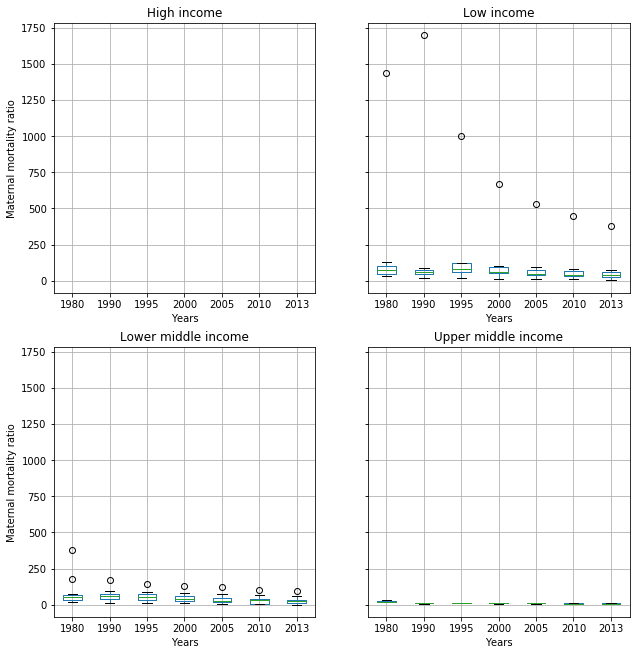

In [48]:
make_box_plot(mat_mort_regions[pd.isnull(mat_mort_regions['1990_income'])], 
              '1995_income', 'Years', 'Maternal mortality ratio')

The most of the countries in this group in 1990 were parts of the unions, that were listed by World Bank in upper middle income group [<a href="#references">3</a>]. Thus, though they underwent some economic difficulties, the ratios of maternal mortality in the countries which in 1995 were classified as of lower middle income, are much lower than in other countries in this group across the world.

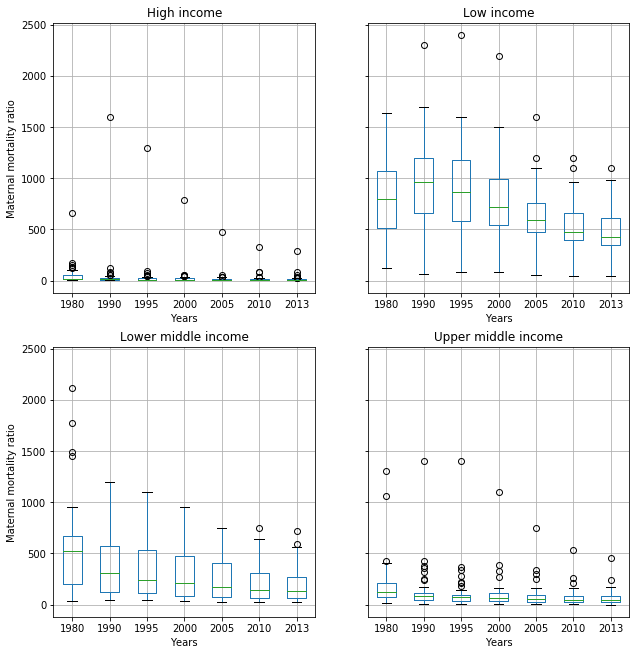

In [49]:
#grouping by income classification of 2013
make_box_plot(mat_mort_regions, '2013_income', 'Years', 'Maternal mortality ratio')

If we group the countries by their income rank in the end of the period, we can see that the countries in higher income groups are demostrating the behavior of lower income groups from the plot based on groups of 1990. Here are two examples.

In [50]:
row = mat_mort_regions[mat_mort_regions['2013_income'] == 'High income']['1990'].idxmax()
mat_mort_regions.iloc[row]

country              Equatorial Guinea
1980                               663
1990                              1600
1995                              1300
2000                               790
2005                               480
2010                               330
2013                               290
four_regions                    africa
eight_regions       africa_sub_saharan
six_regions         sub_saharan_africa
1990_income                 Low income
1995_income                 Low income
2000_income        Lower middle income
2005_income        Upper middle income
2010_income                High income
2013_income                High income
avg_inc_rank                       2.5
rank_change_sum                      3
Name: 50, dtype: object

In [51]:
row = mat_mort_regions[mat_mort_regions['2013_income'] == 'Upper middle income']['1990'].idxmax()
mat_mort_regions.loc[row]

country                         Angola
1980                              1310
1990                              1400
1995                              1400
2000                              1100
2005                               750
2010                               530
2013                               460
four_regions                    africa
eight_regions       africa_sub_saharan
six_regions         sub_saharan_africa
1990_income        Lower middle income
1995_income                 Low income
2000_income                 Low income
2005_income        Lower middle income
2010_income        Lower middle income
2013_income        Upper middle income
avg_inc_rank                   1.83333
rank_change_sum                      1
Name: 3, dtype: object

Of all countries in the data set 97 kept their income category over 1980-2013 (or changed it and then returned back to it), 69 countries improved their position by transitioning into the next income group, 11 countries went two ranks up, while 2 countries went 1 rank down. Angola is the leader in speed going 3 ranks higher - from low into high income country, also going from peak of maternal mortality in 1990 (1600) to 290 in 2013.

In [52]:
mat_mort_regions['rank_change_sum'].value_counts()

 0.0    97
 1.0    69
 2.0    11
-1.0     2
 3.0     1
Name: rank_change_sum, dtype: int64

Plotting average income rank against maternal mortality ratios in 2013, which can be considered a result of development through the whole period, we can see, that those countries whose position in ranking went higher also had lower maternal mortality ratios than countries which had a stable position in higher rank.

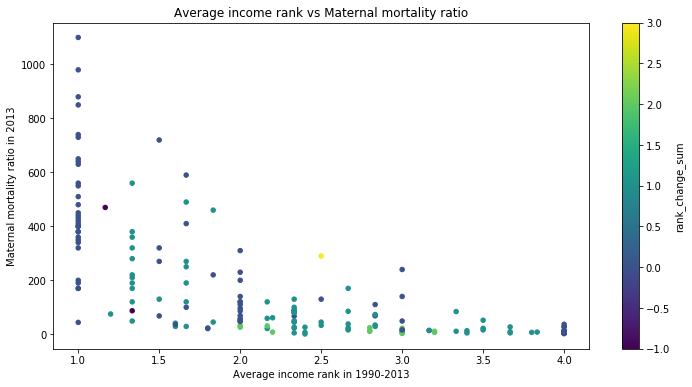

In [53]:
mat_mort_regions.plot.scatter(x='avg_inc_rank', y='2013', 
                              c = 'rank_change_sum', cmap = 'viridis', figsize = (12,6), sharex=False
                             ).set(xlabel = 'Average income rank in 1990-2013', 
                                   ylabel = 'Maternal mortality ratio in 2013', 
                                   title = 'Average income rank vs Maternal mortality ratio');


The correlation between average income rank and maternal mortality ratio appears to be strong and negative, though the relationship is non-linear and the Pearson correlation coefficient increases if logarithmic scale is used.

In [54]:
mat_mort_regions['avg_inc_rank'].corr(mat_mort_regions['2013'])

-0.6706287535724027

In [55]:
mat_mort_regions['avg_inc_rank'].corr(np.log(mat_mort_regions['2013']))

-0.83362196749060158

In [56]:
mat_mort_regions['avg_inc_rank'].corr(mat_mort_regions['2013'], method='kendall')

-0.66724780845000253

##### Region groups
From the geographical perspective the lowest rates in 1980-2013 were demonstrated by the countries in Europe, the highest - in Africa. The greatest decrease of the range of the distribution can be seen in Asia, while in Americas the changes during this period were less pronounced and in percentage close to dynamics in Africa, though in absolute numbers Africa made the greatest progress (see summary statistics below). 

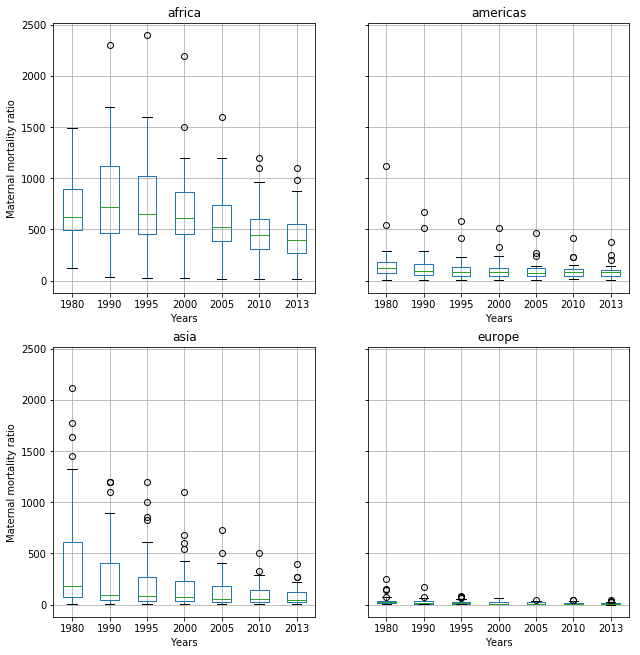

In [57]:
# distributions in geographical regions
make_box_plot(mat_mort_regions, 'four_regions', 'Years', 'Maternal mortality ratio')

In [58]:
mat_mort_regions.groupby('four_regions')['1980', '2013'].describe()

1980                                                           \
             count        mean         std    min      25%     50%      75%   
four_regions                                                                  
africa        52.0  692.038462  323.279152  122.0  493.000  619.50  897.250   
americas      32.0  171.906250  199.842741    7.5   78.175  125.50  177.500   
asia          52.0  424.923077  505.752975    8.6   77.000  179.50  608.250   
europe        44.0   37.184091   44.907678    5.8   13.525   21.45   37.575   

                      2013                                               \
                 max count        mean         std   min     25%    50%   
four_regions                                                              
africa        1490.0  52.0  413.865385  244.533492  15.0  270.00  400.0   
americas      1120.0  32.0   88.531250   74.090609  11.0   43.25   80.0   
asia          2120.0  52.0   85.634615   87.132090   2.0   25.25   49.5   
europe         251.0  44.0   11.272727    8.903523   1.0    5.00    8.0   

                              
                 75%     max  
four_regions                  
africa        552.50  1100.0  
americas      102.50   380.0  
asia          122.50   400.0  
europe         13.25    41.0

In [59]:
get_change('four_regions', mat_mort_regions, 1980, 2013)

,mean,50%
four_regions,,
africa,-40.196187,-35.431800
americas,-48.500273,-36.254980
asia,-79.847031,-72.423398
europe,-69.684005,-62.703963


However, four regions give us a rather broad view. If we consider more specific groups, some regional differences can be seen from the charts.

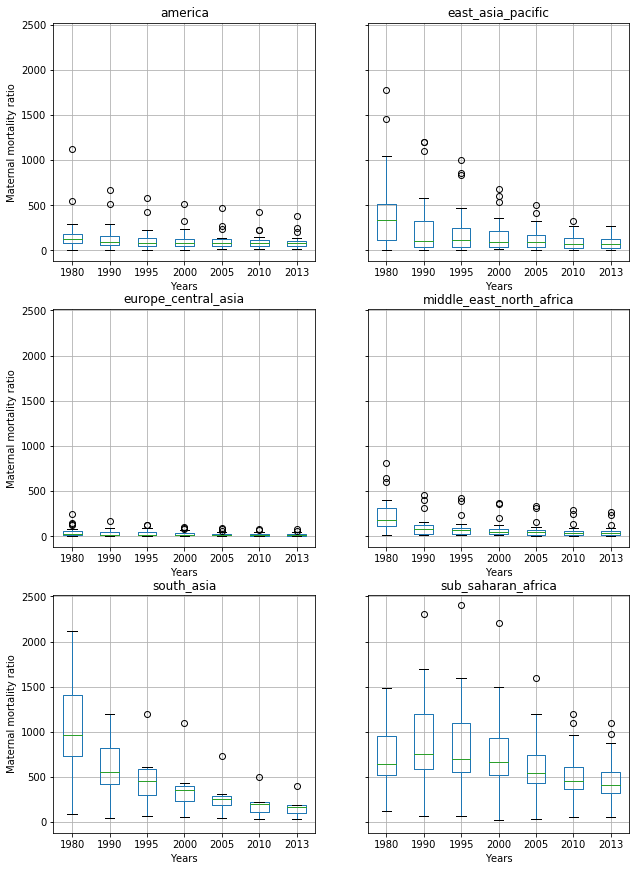

In [60]:
make_box_plot(mat_mort_regions, 'six_regions', 'Years', 'Maternal mortality ratio', (10,15))

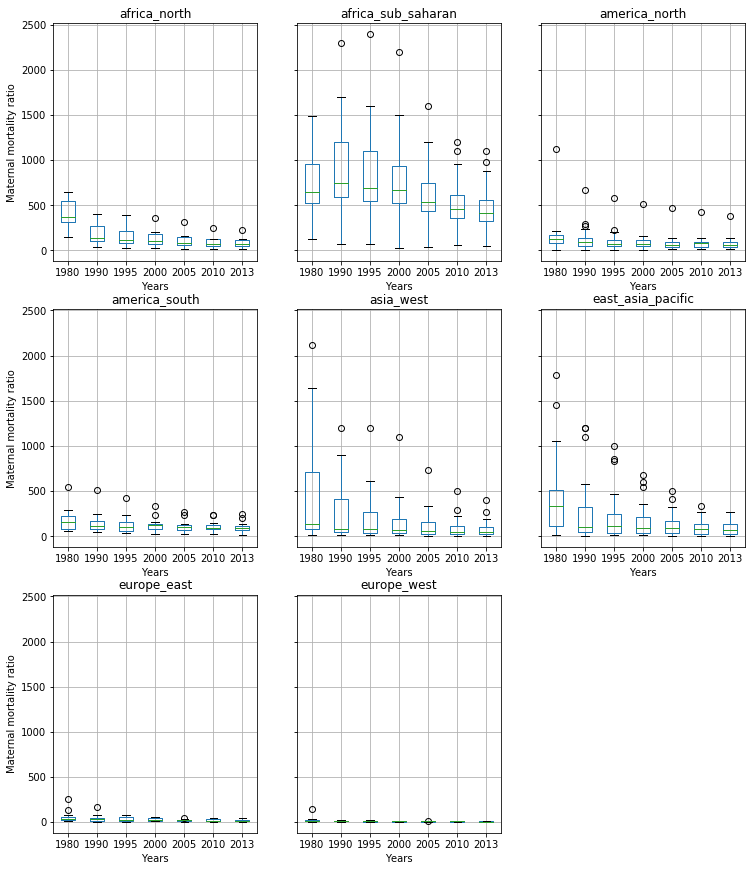

In [61]:
make_box_plot(mat_mort_regions, 'eight_regions', 'Years', 'Maternal mortality ratio', (12,15))

The ratios in East European countries were higher than in West European countries, but in both regions the distributions lie closer to 0 than in any other region, having their measures of center below 15 in the East and below 10 in the West in 2013 with about 70% decrease of the means from 1980.  
Both West Asia and East Asia demonstrated the decrease of maternal mortality ratios, going from the mean of about 425 for both regions in 1980 to 95 and 79 respectively in 2013. North Africa and Sub-Saharan Africa show quite different trends in 1980-2013: while in North Africa the distribution moved down 500 after 1980, below 250 in 2000 with further decrease of ratios, Sub-Saharan Africa went through increase of maternal mortality in 1990-2000 in comparison with 1980 getting back the 1980th levels in 2000. After that the decrease continued but still the overall scale of indexes is incomparable with other regions. 
The distributions in North America and South America over years looks similar except for outliers. The ratios looks average in comparison with other regions, the percentage decrease in average ratios about 45-52%.

In [62]:
mat_mort_regions.groupby('eight_regions').describe()[['1980', '2013']]

1980                                                  \
                   count        mean         std    min      25%     50%   
eight_regions                                                              
africa_north         6.0  405.333333  187.281250  148.0  308.500  374.00   
africa_sub_saharan  46.0  729.434783  319.620584  122.0  519.000  642.00   
america_north       20.0  163.925000  232.321064    7.5   76.725  122.00   
america_south       12.0  185.208333  137.894871   54.9   78.775  162.00   
asia_west           27.0  424.229630  553.921412    8.6   74.400  135.00   
east_asia_pacific   25.0  425.672000  459.506549    8.6  115.000  336.00   
europe_east         24.0   50.866667   50.689444    7.2   26.675   35.40   
europe_west         20.0   20.765000   30.553306    5.8    9.325   13.25   

                                     2013                                \
                        75%     max count        mean         std   min   
eight_regions                                                             
africa_north        549.750   641.0   6.0   90.833333   77.566531  15.0   
africa_sub_saharan  958.000  1490.0  46.0  456.000000  226.655980  53.0   
america_north       165.750  1120.0  20.0   80.000000   78.405156  11.0   
america_south       229.000   547.0  12.0  102.750000   67.075432  14.0   
asia_west           712.000  2120.0  27.0   79.370370   95.234588   2.0   
east_asia_pacific   509.000  1780.0  25.0   92.400000   78.840028   6.0   
europe_east          58.300   251.0  24.0   15.291667   10.259584   1.0   
europe_west          19.375   148.0  20.0    6.450000    2.665076   3.0   

                                                   
                       25%    50%     75%     max  
eight_regions                                      
africa_north         45.25   67.5  112.25   230.0  
africa_sub_saharan  320.00  415.0  560.00  1100.0  
america_north        37.75   60.5   88.75   380.0  
america_south        69.00   88.0  115.00   250.0  
asia_west            19.00   44.0   97.50   400.0  
east_asia_pacific    27.00   68.0  130.00   270.0  
europe_east           7.00   13.0   21.50    41.0  
europe_west           4.00    6.0    8.25    12.0

In [63]:
change_8 = get_change('eight_regions', mat_mort_regions, 1980, 2013).sort_values(by=['mean'])
change_8

,mean,50%
eight_regions,,
asia_west,-81.290706,-67.407407
east_asia_pacific,-78.293146,-79.761905
africa_north,-77.590461,-81.951872
europe_east,-69.937746,-63.276836
europe_west,-68.938117,-54.716981
america_north,-51.197194,-50.409836
america_south,-44.521935,-45.679012
africa_sub_saharan,-37.485844,-35.358255


The highest decrease in means can be observed in West and East Asia, followed by North Africa, in medians - in North Africa, followed by Asia. 

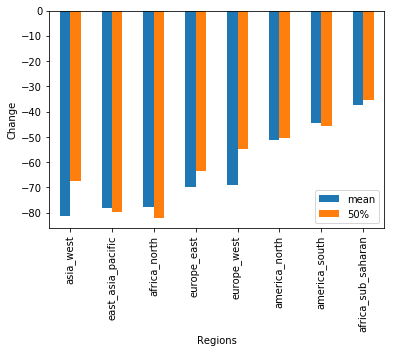

In [64]:
plot = change_8.plot.bar()
plot.set(xlabel = 'Regions', ylabel = 'Change');

We can also combine the region and income variables to see if there are any difference in trends for countries of the same income group but located in different regions and vice versa.

In [65]:
#medians in regional income groups
df_income_eight = mat_mort_regions.iloc[:, 0:17].groupby(['2013_income', 'eight_regions']).median()
df_income_eight['n_countries'] = mat_mort_regions.groupby(['2013_income', 
                                                           'eight_regions']).count()['country']

df_income_eight

1980    1990    1995   2000   2005  \
2013_income         eight_regions                                               
High income         africa_north            NaN     NaN     NaN    NaN    NaN   
                    africa_sub_saharan   663.00  1600.0  1300.0  790.0  480.0   
                    america_north         68.10    43.0    38.0   42.0   33.0   
                    america_south         62.60    48.5    37.0   32.0   29.0   
                    asia_west             52.00    16.0    13.0   11.0    8.0   
                    east_asia_pacific     18.75    16.0    11.5   15.5   11.0   
                    europe_east           30.50    15.0    13.0   12.0   14.0   
                    europe_west           13.25    10.0     9.0    8.0    7.5   
Low income          africa_north            NaN     NaN     NaN    NaN    NaN   
                    africa_sub_saharan   765.50  1050.0   960.0  845.0  695.0   
                    america_north       1120.00   670.0   580.0  510.0  470.0   
                    america_south           NaN     NaN     NaN    NaN    NaN   
                    asia_west           1097.50   670.0   510.0  385.0  285.0   
                    east_asia_pacific    499.00   580.0   470.0  360.0  260.0   
                    europe_east             NaN     NaN     NaN    NaN    NaN   
                    europe_west             NaN     NaN     NaN    NaN    NaN   
Lower middle income africa_north         601.00   310.0   240.0  200.0  160.0   
                    africa_sub_saharan   607.00   670.0   630.0  570.0  470.0   
                    america_north        181.50   220.0   180.0  145.0  125.0   
                    america_south        216.00   210.0   230.0  240.0  240.0   
                    asia_west            251.00   130.0   120.0  100.0   92.0   
                    east_asia_pacific    509.00   170.0   140.0  130.0  130.0   
                    europe_east           41.75    49.5    55.0   41.0   31.0   
                    europe_west             NaN     NaN     NaN    NaN    NaN   
Upper middle income africa_north         294.00    91.0    81.0   65.0   55.0   
                    africa_sub_saharan   400.00   340.0   310.0  300.0  275.0   
                    america_north        122.00    69.0    66.0   71.0   61.0   
                    america_south        149.00   100.0    98.0  120.0   97.0   
                    asia_west            124.00    86.0    79.0   71.0   57.0   
                    east_asia_pacific    165.00    71.0    76.0   63.0   50.0   
                    europe_east           57.70    24.0    23.0   28.0   14.0   
                    europe_west             NaN     NaN     NaN    NaN    NaN   

                                         2010   2013  n_countries  
2013_income         eight_regions                                  
High income         africa_north          NaN    NaN          NaN  
                    africa_sub_saharan  330.0  290.0          1.0  
                    america_north        38.0   37.0          5.0  
                    america_south        23.5   18.0          2.0  
                    asia_west            12.0   11.0          7.0  
                    east_asia_pacific     9.0    7.0          6.0  
                    europe_east           8.0   11.0          9.0  
                    europe_west           7.0    6.0         20.0  
Low income          africa_north          NaN    NaN          NaN  
                    africa_sub_saharan  540.0  475.0         26.0  
                    america_north       420.0  380.0          1.0  
                    america_south         NaN    NaN          NaN  
                    asia_west           210.0  180.0          4.0  
                    east_asia_pacific   200.0  170.0          3.0  
                    europe_east           NaN    NaN          NaN  
                    europe_west           NaN    NaN          NaN  
Lower middle income africa_north        130.0  120.0          3.

From the table above we can see some example of such comparisons for income groups of 2013. Thus the high income countries in North America tend to have higher median maternal mortality ratios than upper middle income countries of West Europe. Sub-Saharan Africa's pattern of high ratios can be seen in all income groups, expect the fact that in upper middle income group the median didn't went up in 1990, as can be seen on the following plots.

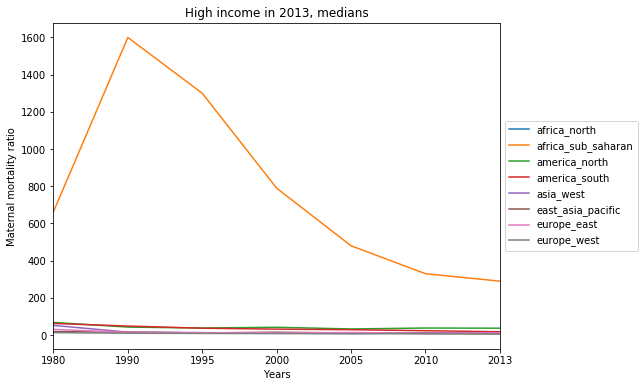

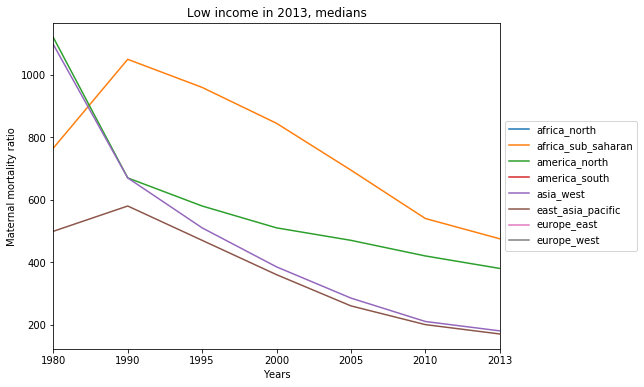

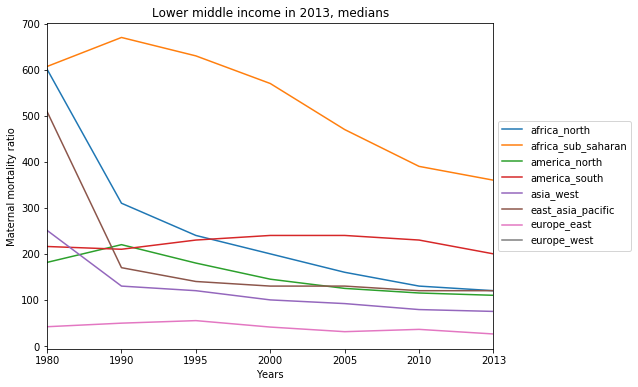

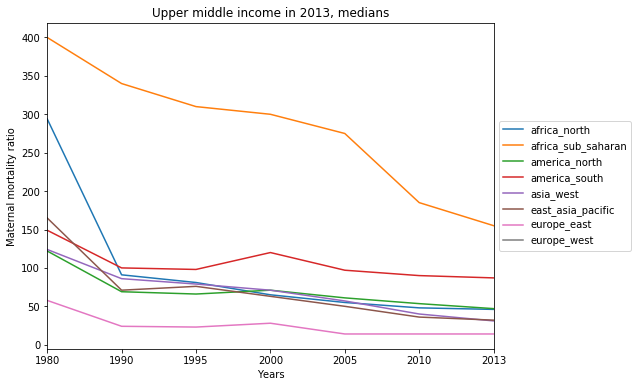

In [66]:
income_groups = list(mat_mort_regions['2013_income'].cat.categories)
for group in income_groups:
    group_regional_medians = mat_mort_regions[mat_mort_regions['2013_income'] 
                 == group].iloc[:, 0:17].groupby('eight_regions').median()
    plot = group_regional_medians.T.plot.line(figsize = (8, 6), title = group + " in 2013, medians")
    plot.set(xlabel = 'Years', ylabel = 'Maternal mortality ratio')
    plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<a id='factors'></a>
### Exploring factors of maternal mortality
Since the economy and geography are the characteristics that can only be considered to influence maternal mortality indirectly, we can explore other variables that may have more direct impact on maternal mortality ratios in different countries. Some of them refer to the demographical parameters, like __total fertility rate__ or __median age__, some - to the healthcare economics, like __government share of health spendings__ or __total health spendings__, or to the healthcare system - like __number of births attended by skilled health staff__.  

The information was obtained on Gapminder.com in the following sections:
- Data/Population/Median age
- Data/Health/Newborn & Infants/Babies per woman
- Data/Health/Health economics

In [67]:
#Loading and preparing data to follow the time period of the maternal mortality data, cleaning missing data
attended_births = pd.read_csv('births_attended_by_skilled_health_staff_percent_of_total.csv')
attended_births = attended_births.replace(0, pd.np.nan)
attended_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 35 columns):
country    187 non-null object
1984       2 non-null float64
1985       1 non-null float64
1986       11 non-null float64
1987       17 non-null float64
1988       8 non-null float64
1989       32 non-null float64
1990       55 non-null float64
1991       47 non-null float64
1992       52 non-null float64
1993       55 non-null float64
1994       54 non-null float64
1995       77 non-null float64
1996       65 non-null float64
1997       68 non-null float64
1998       82 non-null float64
1999       79 non-null float64
2000       136 non-null float64
2001       81 non-null float64
2002       93 non-null float64
2003       101 non-null float64
2004       99 non-null float64
2005       101 non-null float64
2006       121 non-null float64
2007       104 non-null float64
2008       100 non-null float64
2009       99 non-null float64
2010       112 non-null float64
2011       97 non-null 

In [68]:
#no data before 1984

attended_births[['country', '1990', '1995', '2000', '2005', '2010']].info()

#little data for 1990 and 1995

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
country    187 non-null object
1990       55 non-null float64
1995       77 non-null float64
2000       136 non-null float64
2005       101 non-null float64
2010       112 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.8+ KB


In [69]:
total_health_spending = pd.read_csv('total_health_spending_per_person_us.csv')
total_health_spending = total_health_spending.replace(0, pd.np.nan)
total_health_spending.info()

# no data before 1995

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 17 columns):
country    188 non-null object
1995       185 non-null float64
1996       186 non-null float64
1997       186 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       186 non-null float64
2003       186 non-null float64
2004       186 non-null float64
2005       186 non-null float64
2006       186 non-null float64
2007       186 non-null float64
2008       186 non-null float64
2009       186 non-null float64
2010       183 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.0+ KB


In [70]:
gov_share_health_spending = pd.read_csv('government_share_of_total_health_spending_percent.csv')
gov_share_health_spending = gov_share_health_spending.replace(0, pd.np.nan)
gov_share_health_spending.info()

#no data before 1995

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
country    190 non-null object
1995       187 non-null float64
1996       188 non-null float64
1997       188 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       188 non-null float64
2003       188 non-null float64
2004       188 non-null float64
2005       188 non-null float64
2006       188 non-null float64
2007       188 non-null float64
2008       188 non-null float64
2009       188 non-null float64
2010       185 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.3+ KB


In [71]:
total_fert = pd.read_csv('children_per_woman_total_fertility.csv')
total_fert = total_fert.replace(0, pd.np.nan)
total_fert[['country', '1990', '1995', '2000', '2005', '2010']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
country    184 non-null object
1990       184 non-null float64
1995       184 non-null float64
2000       184 non-null float64
2005       184 non-null float64
2010       184 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.7+ KB


In [72]:
median_age = pd.read_csv('median_age_years.csv')
median_age = median_age.replace(0, pd.np.nan)
median_age[['country', '1990', '1995', '2000', '2005', '2010']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
country    184 non-null object
1990       184 non-null float64
1995       184 non-null float64
2000       184 non-null float64
2005       184 non-null float64
2010       184 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.7+ KB


  
Since for most counries the data for all variables in question are available only for several recent years, three dataframes were created as time slices - of 2000, 2005 and 2010, which allows not only to check for correlations, but also to estimate the dynamics over time in recent decades.

In [73]:
#Building dataframes

pd.options.mode.chained_assignment = None

def create_df_for_year(year, mat_mort_df, att_births_df, health_spend_df, gov_share_df, total_fert_df, med_age_df):
    new_df = mat_mort_df[['country', 'eight_regions', '1995_income', year]]
    new_df.rename(columns={year: 'mat_mort'}, inplace=True)
    new_df = pd.merge(new_df, att_births_df[['country', year]], how = 'left', on='country')
    new_df.rename(columns={year: 'att_births'}, inplace=True)
    new_df = pd.merge(new_df, health_spend_df[['country', year]], how = 'left', on='country')
    new_df.rename(columns={year: 'health_spend'}, inplace=True)
    new_df = pd.merge(new_df, gov_share_df[['country', year]], how = 'left', on='country')
    new_df.rename(columns={year: 'gov_share'}, inplace=True)
    new_df = pd.merge(new_df, total_fert_df[['country', year]], how = 'left', on='country')
    new_df.rename(columns={year: 'total_fert'}, inplace=True)
    new_df = pd.merge(new_df, med_age_df[['country', year]], how = 'left', on='country')
    new_df.rename(columns={year: 'median_age'}, inplace=True)
    
    return new_df

df_2000 = create_df_for_year('2000', mat_mort_regions, attended_births, 
                             total_health_spending, gov_share_health_spending, total_fert, median_age)
df_2000.describe()

,mat_mort,att_births,health_spend,gov_share,total_fert,median_age
count,180.000000,129.000000,175.000000,177.000000,180.000000,180.000000
mean,260.722222,79.775969,427.645943,54.822712,3.344944,25.195556
std,357.611163,27.366910,798.113980,20.307752,1.780011,7.827711
min,4.000000,5.600000,3.380000,1.140000,1.120000,14.800000
25%,24.000000,62.800000,24.800000,40.500000,1.770000,18.375000
50%,80.500000,96.600000,91.200000,53.900000,2.840000,22.700000
75%,400.000000,99.200000,333.500000,71.300000,4.550000,32.000000
max,2200.000000,100.000000,4700.000000,94.600000,7.680000,41.200000


In [74]:
df_2005 = create_df_for_year('2005', mat_mort_regions, attended_births, 
                             total_health_spending, gov_share_health_spending, total_fert, median_age)
df_2005.describe()

,mat_mort,att_births,health_spend,gov_share,total_fert,median_age
count,180.000000,96.000000,174.000000,176.000000,180.000000,180.000000
mean,215.272222,89.066667,722.708103,55.881136,3.125667,26.368333
std,289.273118,21.068233,1341.835499,20.087731,1.668508,8.178282
min,2.000000,5.700000,5.140000,8.980000,1.170000,15.100000
25%,17.750000,91.475000,41.200000,41.625000,1.785000,19.250000
50%,69.500000,98.600000,173.500000,59.450000,2.585000,24.100000
75%,322.500000,99.700000,490.750000,72.225000,4.237500,34.075000
max,1600.000000,100.000000,6700.000000,94.100000,7.610000,43.000000


In [75]:
df_2010 = create_df_for_year('2010', mat_mort_regions, attended_births, 
                             total_health_spending, gov_share_health_spending, total_fert, median_age)
df_2010.describe()

,mat_mort,att_births,health_spend,gov_share,total_fert,median_age
count,180.000000,105.000000,171.000000,173.000000,180.000000,180.000000
mean,180.094444,87.266667,997.726901,57.622543,2.985167,27.586111
std,239.007064,20.820467,1718.768996,19.491453,1.519855,8.494913
min,2.000000,16.600000,11.900000,10.000000,1.190000,15.000000
25%,17.500000,82.200000,71.150000,44.100000,1.810000,19.900000
50%,69.500000,98.500000,278.000000,59.500000,2.475000,25.900000
75%,252.500000,99.600000,889.000000,73.700000,4.042500,35.550000
max,1200.000000,100.000000,8360.000000,93.400000,7.490000,44.700000


In [76]:
df_2010.describe() - df_2000.describe()

,mat_mort,att_births,health_spend,gov_share,total_fert,median_age
count,0.000000,-24.000000,-4.000000,-4.000000,0.000000,0.000000
mean,-80.627778,7.490698,570.080958,2.799831,-0.359778,2.390556
std,-118.604099,-6.546443,920.655016,-0.816299,-0.260156,0.667203
min,-2.000000,11.000000,8.520000,8.860000,0.070000,0.200000
25%,-6.500000,19.400000,46.350000,3.600000,0.040000,1.525000
50%,-11.000000,1.900000,186.800000,5.600000,-0.365000,3.200000
75%,-147.500000,0.400000,555.500000,2.400000,-0.507500,3.550000
max,-1000.000000,0.000000,3660.000000,-1.200000,-0.190000,3.500000


As we can see from summary statistics both mean and median of total fertility rate decreased in 2000-2010 together with maternal mortality, while the indices of health economy and median age grew.
We can now use scatter plot to explore relations between maternal mortality and new variables.
  
__Number of births attended by skilled health staff__

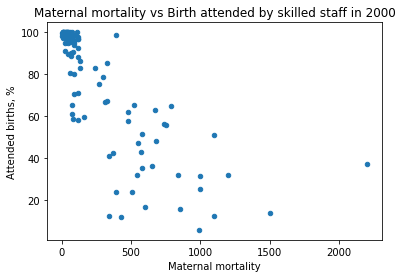

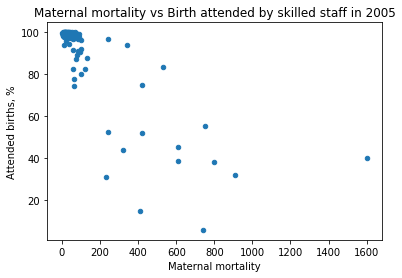

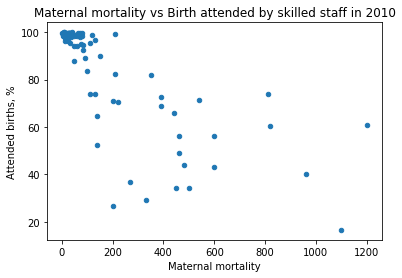

In [77]:
df_list = [(df_2000, '2000'), (df_2005, '2005'), (df_2010, '2010')]
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='att_births', 
                       title = 'Maternal mortality vs Birth attended by skilled staff' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Attended births, %')

In [78]:
#correlation coefficients
for df in df_list:
    print(df[1], df[0]['mat_mort'].corr(df[0]['att_births']))

2000 -0.797122892083
2005 -0.791821815222
2010 -0.777595964211


__Total health spending__

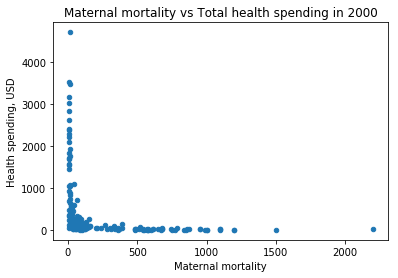

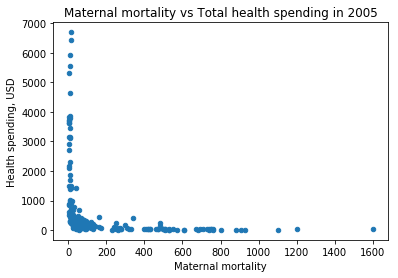

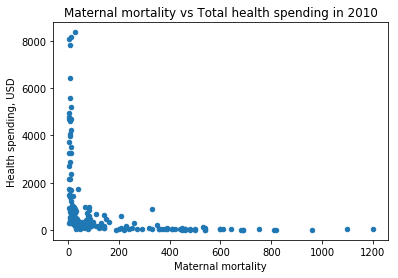

In [79]:
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='health_spend', 
                       title = 'Maternal mortality vs Total health spending' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Health spending, USD')

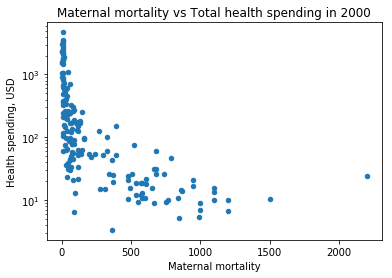

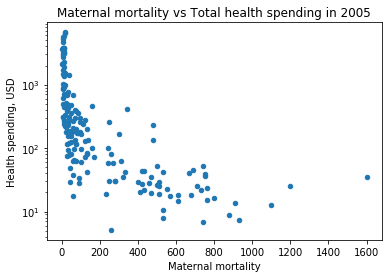

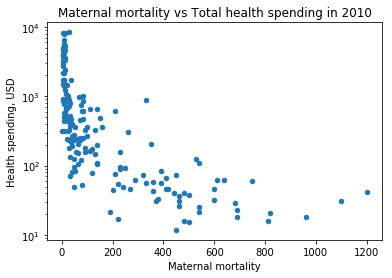

In [80]:
#Changing the scale to logarithmic to check for linearity
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='health_spend', 
                       title = 'Maternal mortality vs Total health spending' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Health spending, USD')
    plot.set_yscale('log')

In [81]:
#correlation coefficients
for df in df_list:
    print(df[1], df[0]['mat_mort'].corr(np.log(df[0]['health_spend'])))

2000 -0.664136542096
2005 -0.679928095944
2010 -0.71068339312


__Goverment share of total health spending__

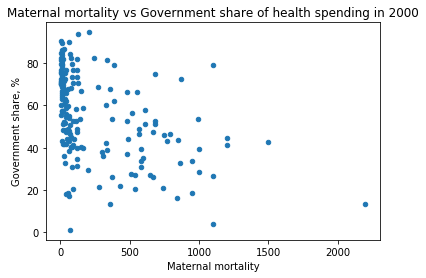

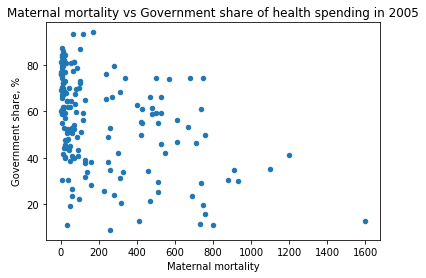

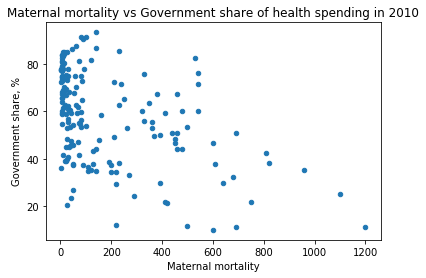

In [82]:
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='gov_share', 
                       title = 'Maternal mortality vs Government share of health spending' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Government share, %')

In [83]:
#correlation coefficients
for df in df_list:
    print(df[1], df[0]['mat_mort'].corr(df[0]['gov_share']))

2000 -0.434547278283
2005 -0.42122301318
2010 -0.471472941356


__Total fertility rate (babies per woman)__

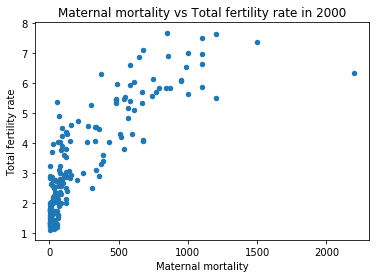

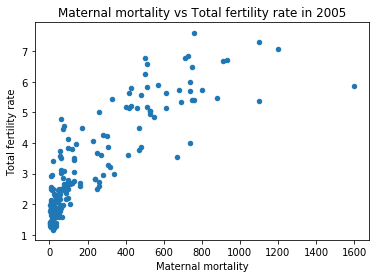

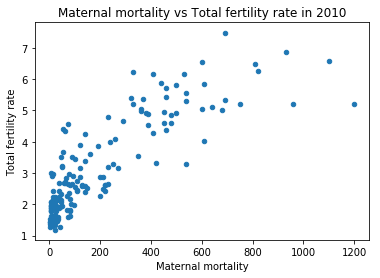

In [84]:
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='total_fert', 
                       title = 'Maternal mortality vs Total fertility rate' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Total fertility rate')

In [85]:
#correlation coefficients
for df in df_list:
    print(df[1], df[0]['mat_mort'].corr(df[0]['total_fert']))

2000 0.832762132538
2005 0.853082447384
2010 0.850798947618


__Median age of the population__

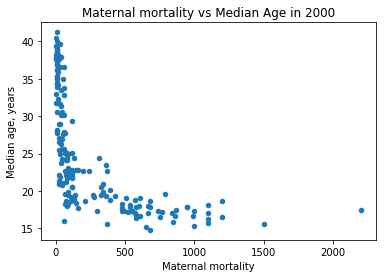

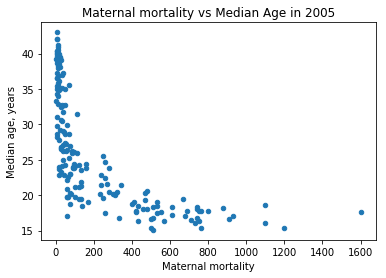

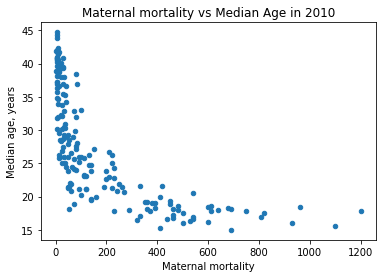

In [86]:
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='median_age', 
                       title = 'Maternal mortality vs Median Age' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Median age, years')

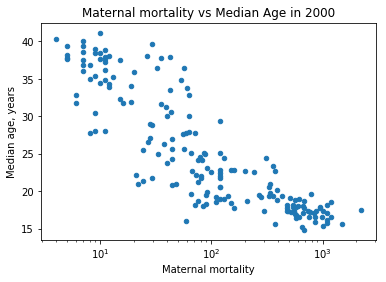

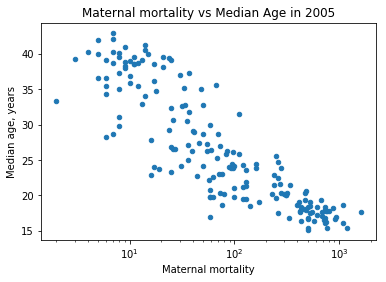

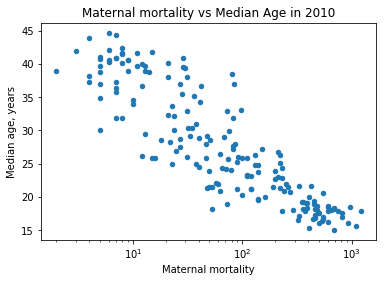

In [87]:
#Changing the scale to logarithmic to check for linearity
for df in df_list:
    plot = df[0].plot.scatter(x='mat_mort', y='median_age', 
                       title = 'Maternal mortality vs Median Age' + " in " + df[1])
    plot.set(xlabel = 'Maternal mortality', ylabel = 'Median age, years')
    plot.set_xscale('log');

In [88]:
#correlation coefficients
for df in df_list:
    print(df[1], df[0]['mat_mort'].corr(df[0]['median_age'], method='kendall'))

2000 -0.708503777146
2005 -0.713105474963
2010 -0.709145962719


As can be seen from the charts and correlation coefficients above, there is a strong positive correlation between maternal mortality and total fertility rate (number of children per woman), and also a strong negative correlation between maternal mortality and number of births attended by skilled health staff. There is also negative correlation that tends to grow over time between maternal mortality and median age of the country population, though from scatter plot the relation appears to be non-linear. The non-linear relationship can also be seen between maternal mortality and total health spendings. The government share of health spending also shows moderate negative correlation with maternal mortality.  
The significance of such relations remains to be estimated. However, possible interrelations between independent variables should also be considered. For example, the countries, where median age of the populaiton is higher, are typically also the developed countries that already went through the second demographic transition, thus having lower total fertility rate and higher health spendings in absolute numbers. We can see some support to this statement in the following correlation coefficients.

In [89]:
# Interrelations between independent variables

# median age vs total health spending
for df in df_list:
    print(df[1], df[0]['median_age'].corr(df[0]['health_spend'], method='kendall'))

2000 0.590960094961
2005 0.62545855883
2010 0.643350087982


In [90]:
# median age vs government share of health spending
for df in df_list:
    print(df[1], df[0]['median_age'].corr(df[0]['gov_share']))

2000 0.451683470869
2005 0.409939842691
2010 0.433654999958


In [91]:
# total fertility rate vs median age
for df in df_list:
    print(df[1], df[0]['total_fert'].corr(df[0]['median_age']))

2000 -0.852805755335
2005 -0.844956498076
2010 -0.853072569556


In [92]:
# total health spending vs number of birth attended by skilled health staff
for df in df_list:
    print(df[1], df[0]['health_spend'].corr(df[0]['att_births'], method='kendall'))

2000 0.523894167109
2005 0.428297523688
2010 0.438663543247


In [93]:
# government share vs number of birth attended by skilled health staff
for df in df_list:
    print(df[1], df[0]['gov_share'].corr(df[0]['att_births']))

2000 0.485948481998
2005 0.452824618241
2010 0.528761131139


Thus, median age of the population has rather strong correlation with total health spendings, especially in recent years, and moderate correlation with the government share of total health spending, while its correlation with total fertility rate is negative and strong. Also the number of births attended by skilled health staff has moderate positive correlation with both total health spending and its government share.

<a id='conclusions'></a>
## Conclusions

The exploratory analysis of the data set has shown that during 1980-2013 years maternal mortality in the world has decreased significantly. The distribution of observations, which remained positively skewed over years, became narrower and more concentrated below 100 cases per 100000 live births. The mean mortality ratio over the world dropped from 362.3 in 1980 to 162.8 in 2013 (or by 55.1%). The median decreased from 169.5 in 1980 to 64 in 2013 (by 62.2%, mostly during 1980-1990). The mean was decreasing gradually during the whole period in question, while the median dropped most significantly in 1980-1990.  
The share of countries having maternal mortality ratios lower than world average remained at 67-68% in 1990-2013, and was only several percent lower in 1980 (63%). Meanwhile the number of countries with maternal mortality ratio lower than 100 increased from 37.8% in 1980 to 60% in 2013.  
West Europe is the geographical leader in terms of lowest ratios, followed by East Europe, while Sub-Saharan Africa remained the example of the highest values, though its mean and medians decreased by 38% and 35% respectively during the period in question. The significant improvements can be seen in Asian regions (by about 80% for the means) and North Africa (by 78%).  
Combining the economical and geographical characteristics we can conclude that sometimes geography may been considered the prevailing factor in the same income group. Thus the ratios in upper middle income east european countries are usually smaller than of high income countries in both Americas while upper middle income countries in Africa and South America still have much higher maternal mortality, though with a great decrease since 1980. Here the differences in healthcare systems of the countries and regions may have their impact. In general, both regional and income characteristics can't be implied on its own, but only as a reflection of the combinations of demographical, social and economical parameters developed in specific country groups over time.  

Among other factors which may be considered of more direct influence on maternal mortality, the following were explored: the number of births attended by skilled health staff, total fertility rate (number of babies per woman) and median age of the population, total health spendings in US dollars and government share of health spendings as percentage. The EDA was limited to only three year - 2000, 2005 and 2010 - because of missing data.  
A strong positive correlation can be seen between maternal mortality and total fertility rate and also a strong negative correlation between maternal mortality and number of births attended by skilled health staff. There is also negative correlation that tends to grow over time between maternal mortality and median age of the population, though from scatter plot the relation appears to be non-linear. The non-linear negative relationship can also be seen between maternal mortality and total health spending. The significance of the correlation coefficients remains to be estimated. Also the interrelations between independent variables should be taken into account in further analysis and modelling.  

<a id='#references'></a>
## References
1. https://www.gapminder.org/data/  
2. https://www.gapminder.org/data/geo/  
3. http://databank.worldbank.org/data/download/site-content/OGHIST.xls  
4. http://blogs.worldbank.org/opendata/node/1859
5. https://en.wikipedia.org/wiki/Sierra_Leone